In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline
from IPython.display import FileLink

In [4]:
# Load the dataset (update the file path if needed)
file_path = 'Amazon Sale Report.csv'  # Replace with your file path
df = pd.read_csv(file_path,encoding='unicode_escape')

# Display the first few rows
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [9]:
pd.isnull(df)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Month,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [7]:
# Drop unnecessary columns
columns_to_drop = ['index', 'Order ID', 'New', 'PendingS', 'currency', 'ship-postal-code', 'ship-country']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')



In [10]:
# Fill missing values for categorical columns
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)

In [11]:
# Drop rows where 'Amount' is missing
df.dropna(subset=['Amount'], inplace=True)

In [12]:
# Convert 'Amount' to integer and 'Date' to datetime
df['Amount'] = df['Amount'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [13]:
# Check the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121176 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                121176 non-null  datetime64[ns]
 1   Status              121176 non-null  object        
 2   Fulfilment          121176 non-null  object        
 3   Sales Channel       121176 non-null  object        
 4   ship-service-level  121176 non-null  object        
 5   Category            121176 non-null  object        
 6   Size                121176 non-null  object        
 7   Courier Status      121176 non-null  object        
 8   Qty                 121176 non-null  int64         
 9   Amount              121176 non-null  int32         
 10  ship-city           121176 non-null  object        
 11  ship-state          121176 non-null  object        
 12  B2B                 121176 non-null  bool          
 13  fulfilled-by        37527 non-null

In [8]:
# Extract useful date features
df['Month'] = df['Date'].dt.to_period('M')  # Year and month
df['Year'] = df['Date'].dt.year
df.head()


,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Month,Year
0,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647,MUMBAI,MAHARASHTRA,False,Easy Ship,2022-04,2022
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406,BENGALURU,KARNATAKA,False,Easy Ship,2022-04,2022
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,True,NaN,2022-04,2022
3,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753,PUDUCHERRY,PUDUCHERRY,False,Easy Ship,2022-04,2022
4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574,CHENNAI,TAMIL NADU,False,NaN,2022-04,2022


# Sales Overview

In [14]:
# Calculate key metrics
total_sales = df['Amount'].sum()
avg_order_value = df['Amount'].mean()
total_qty = df['Qty'].sum()

In [15]:
print("Total Sales:", total_sales)
print("Average Order Value (AOV):", avg_order_value)
print("Total Quantities Sold:", total_qty)


Total Sales: 78587753
Average Order Value (AOV): 648.5422278338945
Total Quantities Sold: 116479


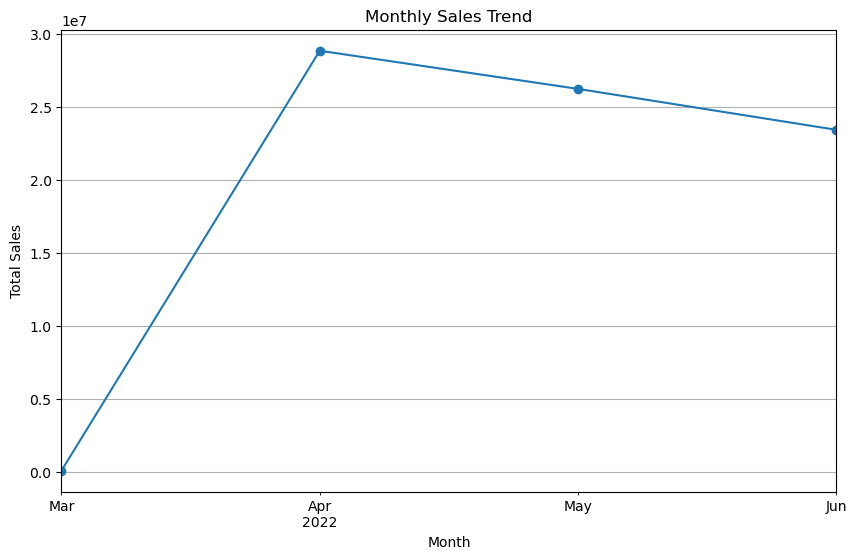

In [16]:
# Plot monthly sales trend
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

# Product Analysis

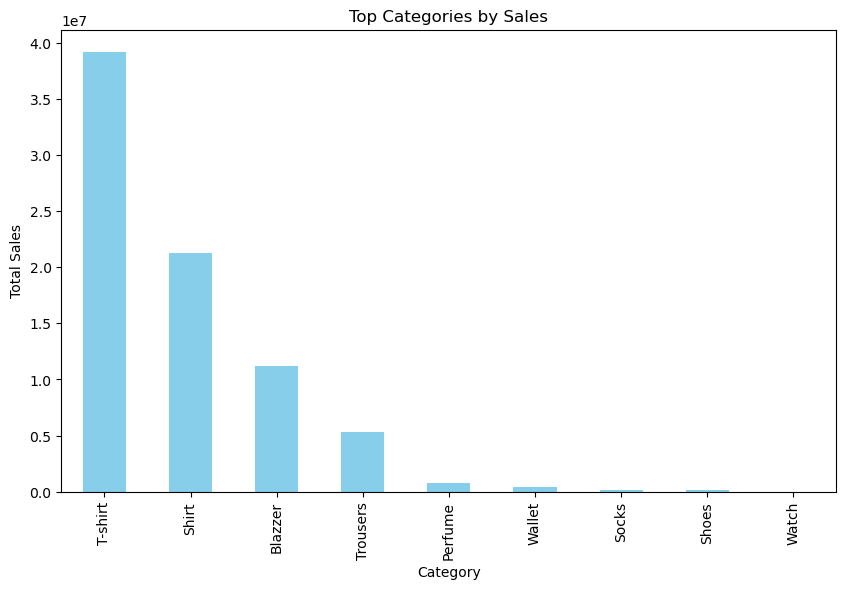

In [17]:
# Top categories by sales
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Top Categories by Sales', figsize=(10, 6), color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

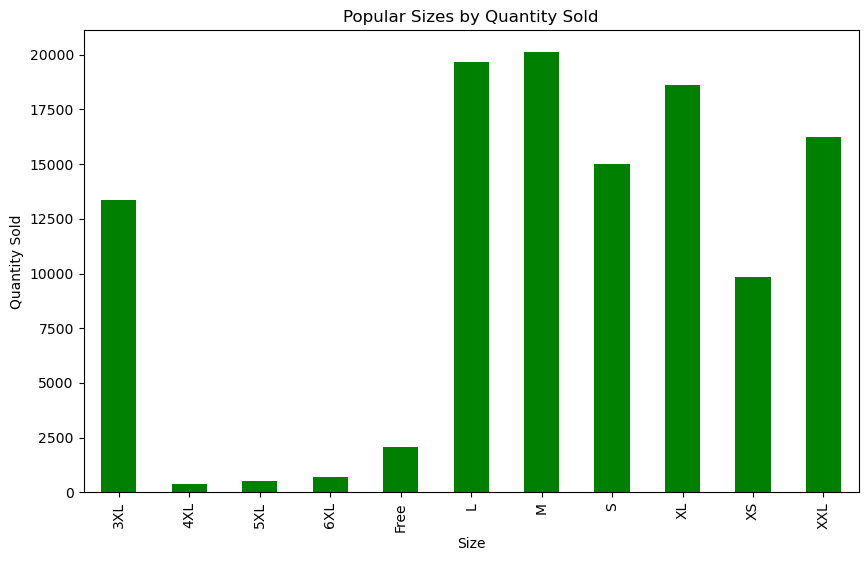

In [18]:
# Popular sizes by quantity sold
size_qty = df.groupby('Size')['Qty'].sum()
size_qty.plot(kind='bar', title='Popular Sizes by Quantity Sold', figsize=(10, 6), color='green')
plt.xlabel('Size')
plt.ylabel('Quantity Sold')
plt.show()

# Fulfillment Analysis

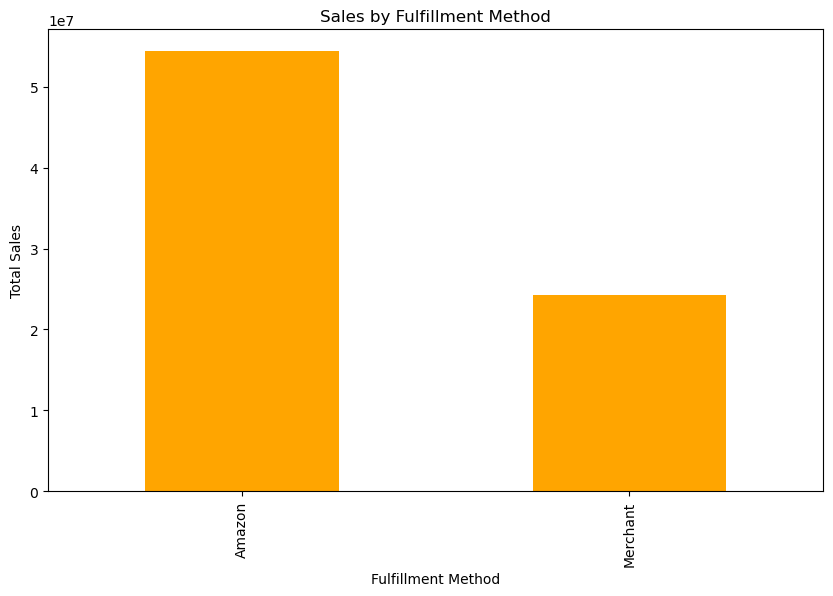

In [19]:
# Sales by fulfillment method
fulfillment_sales = df.groupby('Fulfilment')['Amount'].sum()
fulfillment_sales.plot(kind='bar', title='Sales by Fulfillment Method', figsize=(10, 6), color='orange')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales')
plt.show()

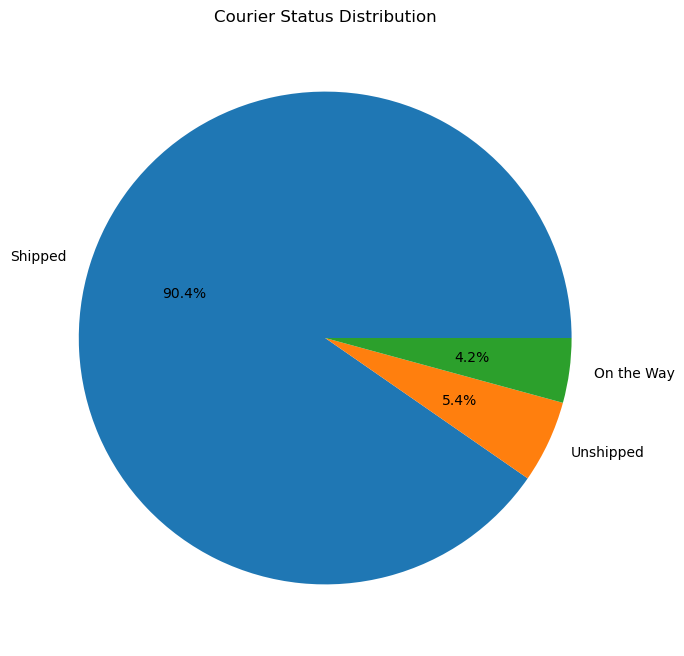

In [20]:

# Courier status distribution
courier_status = df['Courier Status'].value_counts()
courier_status.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Courier Status Distribution')
plt.ylabel('')
plt.show()

# Geographical Analysis



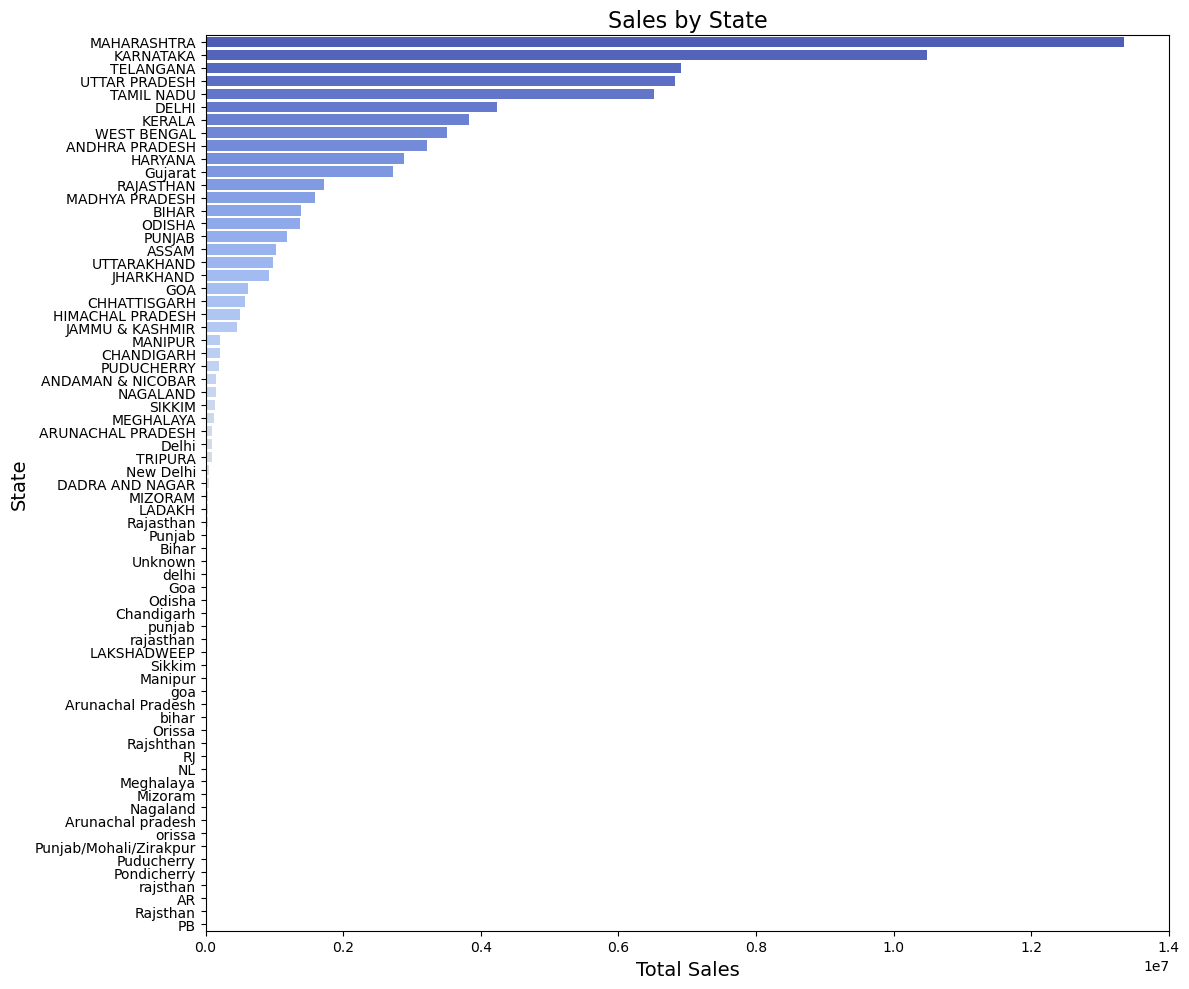

In [27]:
# State-wise Sales 
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Horizontal bar plot with larger figure size
plt.figure(figsize=(12, 10))  # Adjust height and width for better readability
sns.barplot(x=state_sales.values, y=state_sales.index, palette='coolwarm')
plt.title('Sales by State', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()  # Ensures everything fits
plt.show()


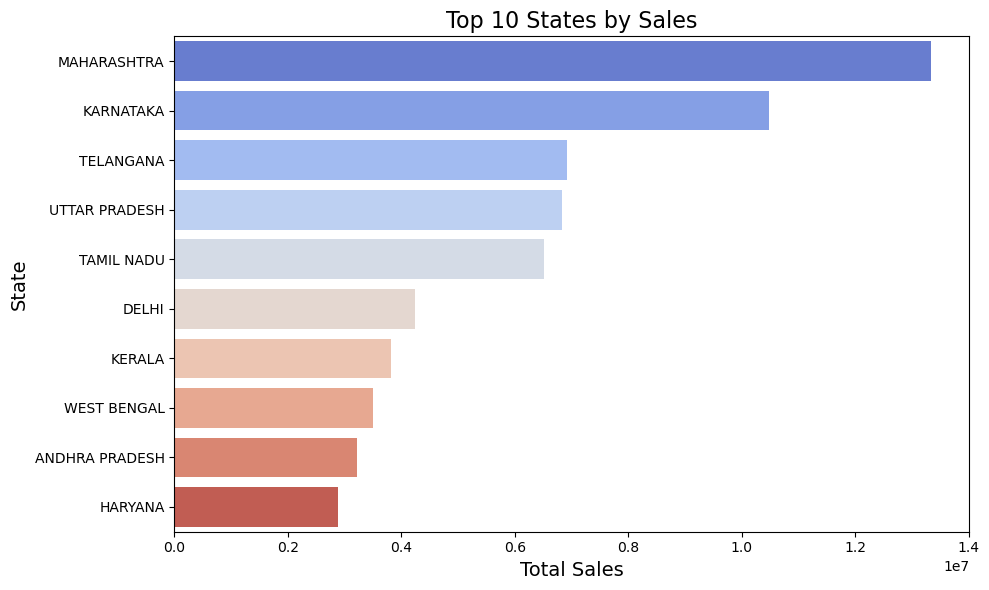

In [29]:
# Plotting top 10 states by sales
top_states = state_sales.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')
plt.title('Top 10 States by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()
plt.show()


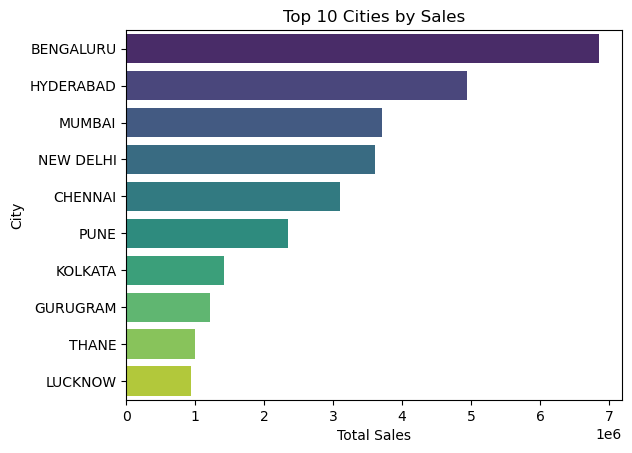

In [22]:

# City-wise sales (Top 10)
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=city_sales.values, y=city_sales.index, palette='viridis')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

# Save the Cleaned Data

In [38]:
# Save the cleaned dataset for future use
df.to_csv('Cleaned_Amazon_Sales_Data.csv', index=False)
print("Cleaned data saved as 'Cleaned_Amazon_Sales_Data.csv'.")



Cleaned data saved as 'Cleaned_Amazon_Sales_Data.csv'.


In [36]:


# Create a download link
FileLink('Cleaned_Amazon_Sales_Data.csv')



C:\Users\saanv\Cleaned_Amazon_Sales_Data.csv

In [40]:
# Verify the saved dataset
cleaned_df = pd.read_csv('Cleaned_Amazon_Sales_Data.csv')
print(cleaned_df.head())


         Date                        Status Fulfilment Sales Channel  \
0  2022-04-30                     Cancelled   Merchant     Amazon.in   
1  2022-04-30  Shipped - Delivered to Buyer   Merchant     Amazon.in   
2  2022-04-30                       Shipped     Amazon     Amazon.in   
3  2022-04-30                     Cancelled   Merchant     Amazon.in   
4  2022-04-30                       Shipped     Amazon     Amazon.in   

  ship-service-level  Category Size Courier Status  Qty  Amount    ship-city  \
0           Standard   T-shirt    S     On the Way    0     647       MUMBAI   
1           Standard     Shirt  3XL        Shipped    1     406    BENGALURU   
2          Expedited     Shirt   XL        Shipped    1     329  NAVI MUMBAI   
3           Standard   Blazzer    L     On the Way    0     753   PUDUCHERRY   
4          Expedited  Trousers  3XL        Shipped    1     574      CHENNAI   

    ship-state    B2B fulfilled-by    Month  Year  
0  MAHARASHTRA  False    Easy Ship